**Example of Simple Linear Regression**
This is Diabetes Dataset, a well-known dataset used in machine learning and statistics for predictive modeling of diabetes onset. The data includes various medical attributes (like glucose level, insulin, BMI) and a final Outcome value, which indicates whether or not the patient has diabetes.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
# Step 2: Read the CSV file (edit the path as per your exact location)
file_path = '/content/drive/My Drive/DataSets/diabetes.csv'

In [3]:
df=pd.read_csv(file_path)

In [27]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Step 1: Basic Info
print("Initial Information of Datasets:")
df.info()

Initial Information of Datasets:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
null_values = df.isnull().sum()
print("\nMissing values:\n", null_values)


Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**This process is a crucial part of data cleaning and preparing dataset for machine learning. In your diabetes dataset, values like:**

**Glucose = 0, BloodPressure = 0 , Insulin = 0 , BMI = 0**
 **The vaules are 0, not biologically or medically possible for a living person. These values are likely to have Missing data entries , Errors during data **collection.And we have to manipulate it.

In [ ]:
# List of columns where 0 is invalid
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [19]:
import numpy as np
# Replace 0s with NaN
df[cols_to_fix] = df[cols_to_fix].replace(0, np.nan)

In [20]:
# Now check how many NaNs we have
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


**In this process, we first identified certain columns (Glucose, BloodPressure, SkinThickness, Insulin, BMI) where a value of 0 is medically unrealistic and likely indicates missing data. We replaced those 0s with NaN to mark them as missing values.**

In [21]:
# Fill NaN values with the median of each column
cols_to_fill = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_to_fill:
    df[col] = df[col].fillna(df[col].median())


**we filled those NaN values with the median of each respective column. This step ensures the dataset has no missing values, and using the median helps reduce the effect of outliers, leading to a more stable and reliable dataset for machine learning models.**

In [22]:
print("Missing values after filling:")
print(df.isnull().sum())


Missing values after filling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [24]:
# Check how many duplicate rows exist
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


In [25]:
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (768, 9)


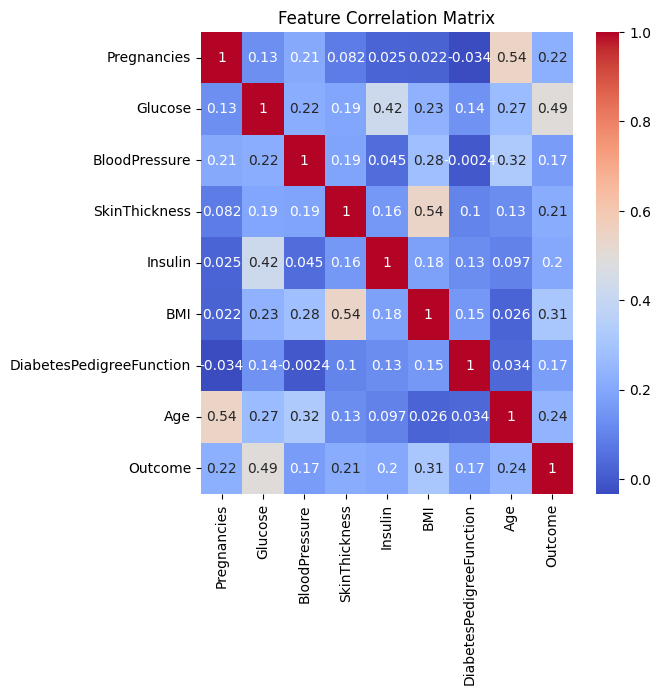

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


**Explanation:**
General Info: .info() provides data types and non-null values, and .describe() gives a summary of statistics for numeric columns.

Missing Values: .isnull().sum() helps identify columns with missing data.

Correlation Heatmap: Displays correlations between features. The coolwarm color map highlights strong correlations.

Target Variable Distribution: A countplot shows the distribution of the target variable (Outcome).

Pairplot: Visualizes pairwise relationships between features, colored by the target variable (Outcome).

Histograms: Provides an overview of the distribution of each feature.

Boxplot: Identifies outliers in the features.

Violin Plot: Compares distributions of each feature with respect to the target variable (Outcome).

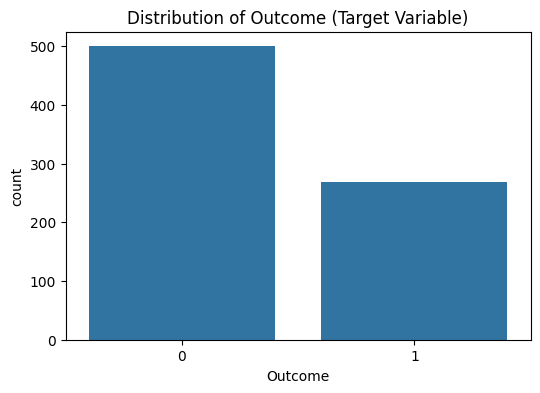

In [38]:
# Distribution of 'Outcome' (target variable)
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome (Target Variable)')
plt.show()

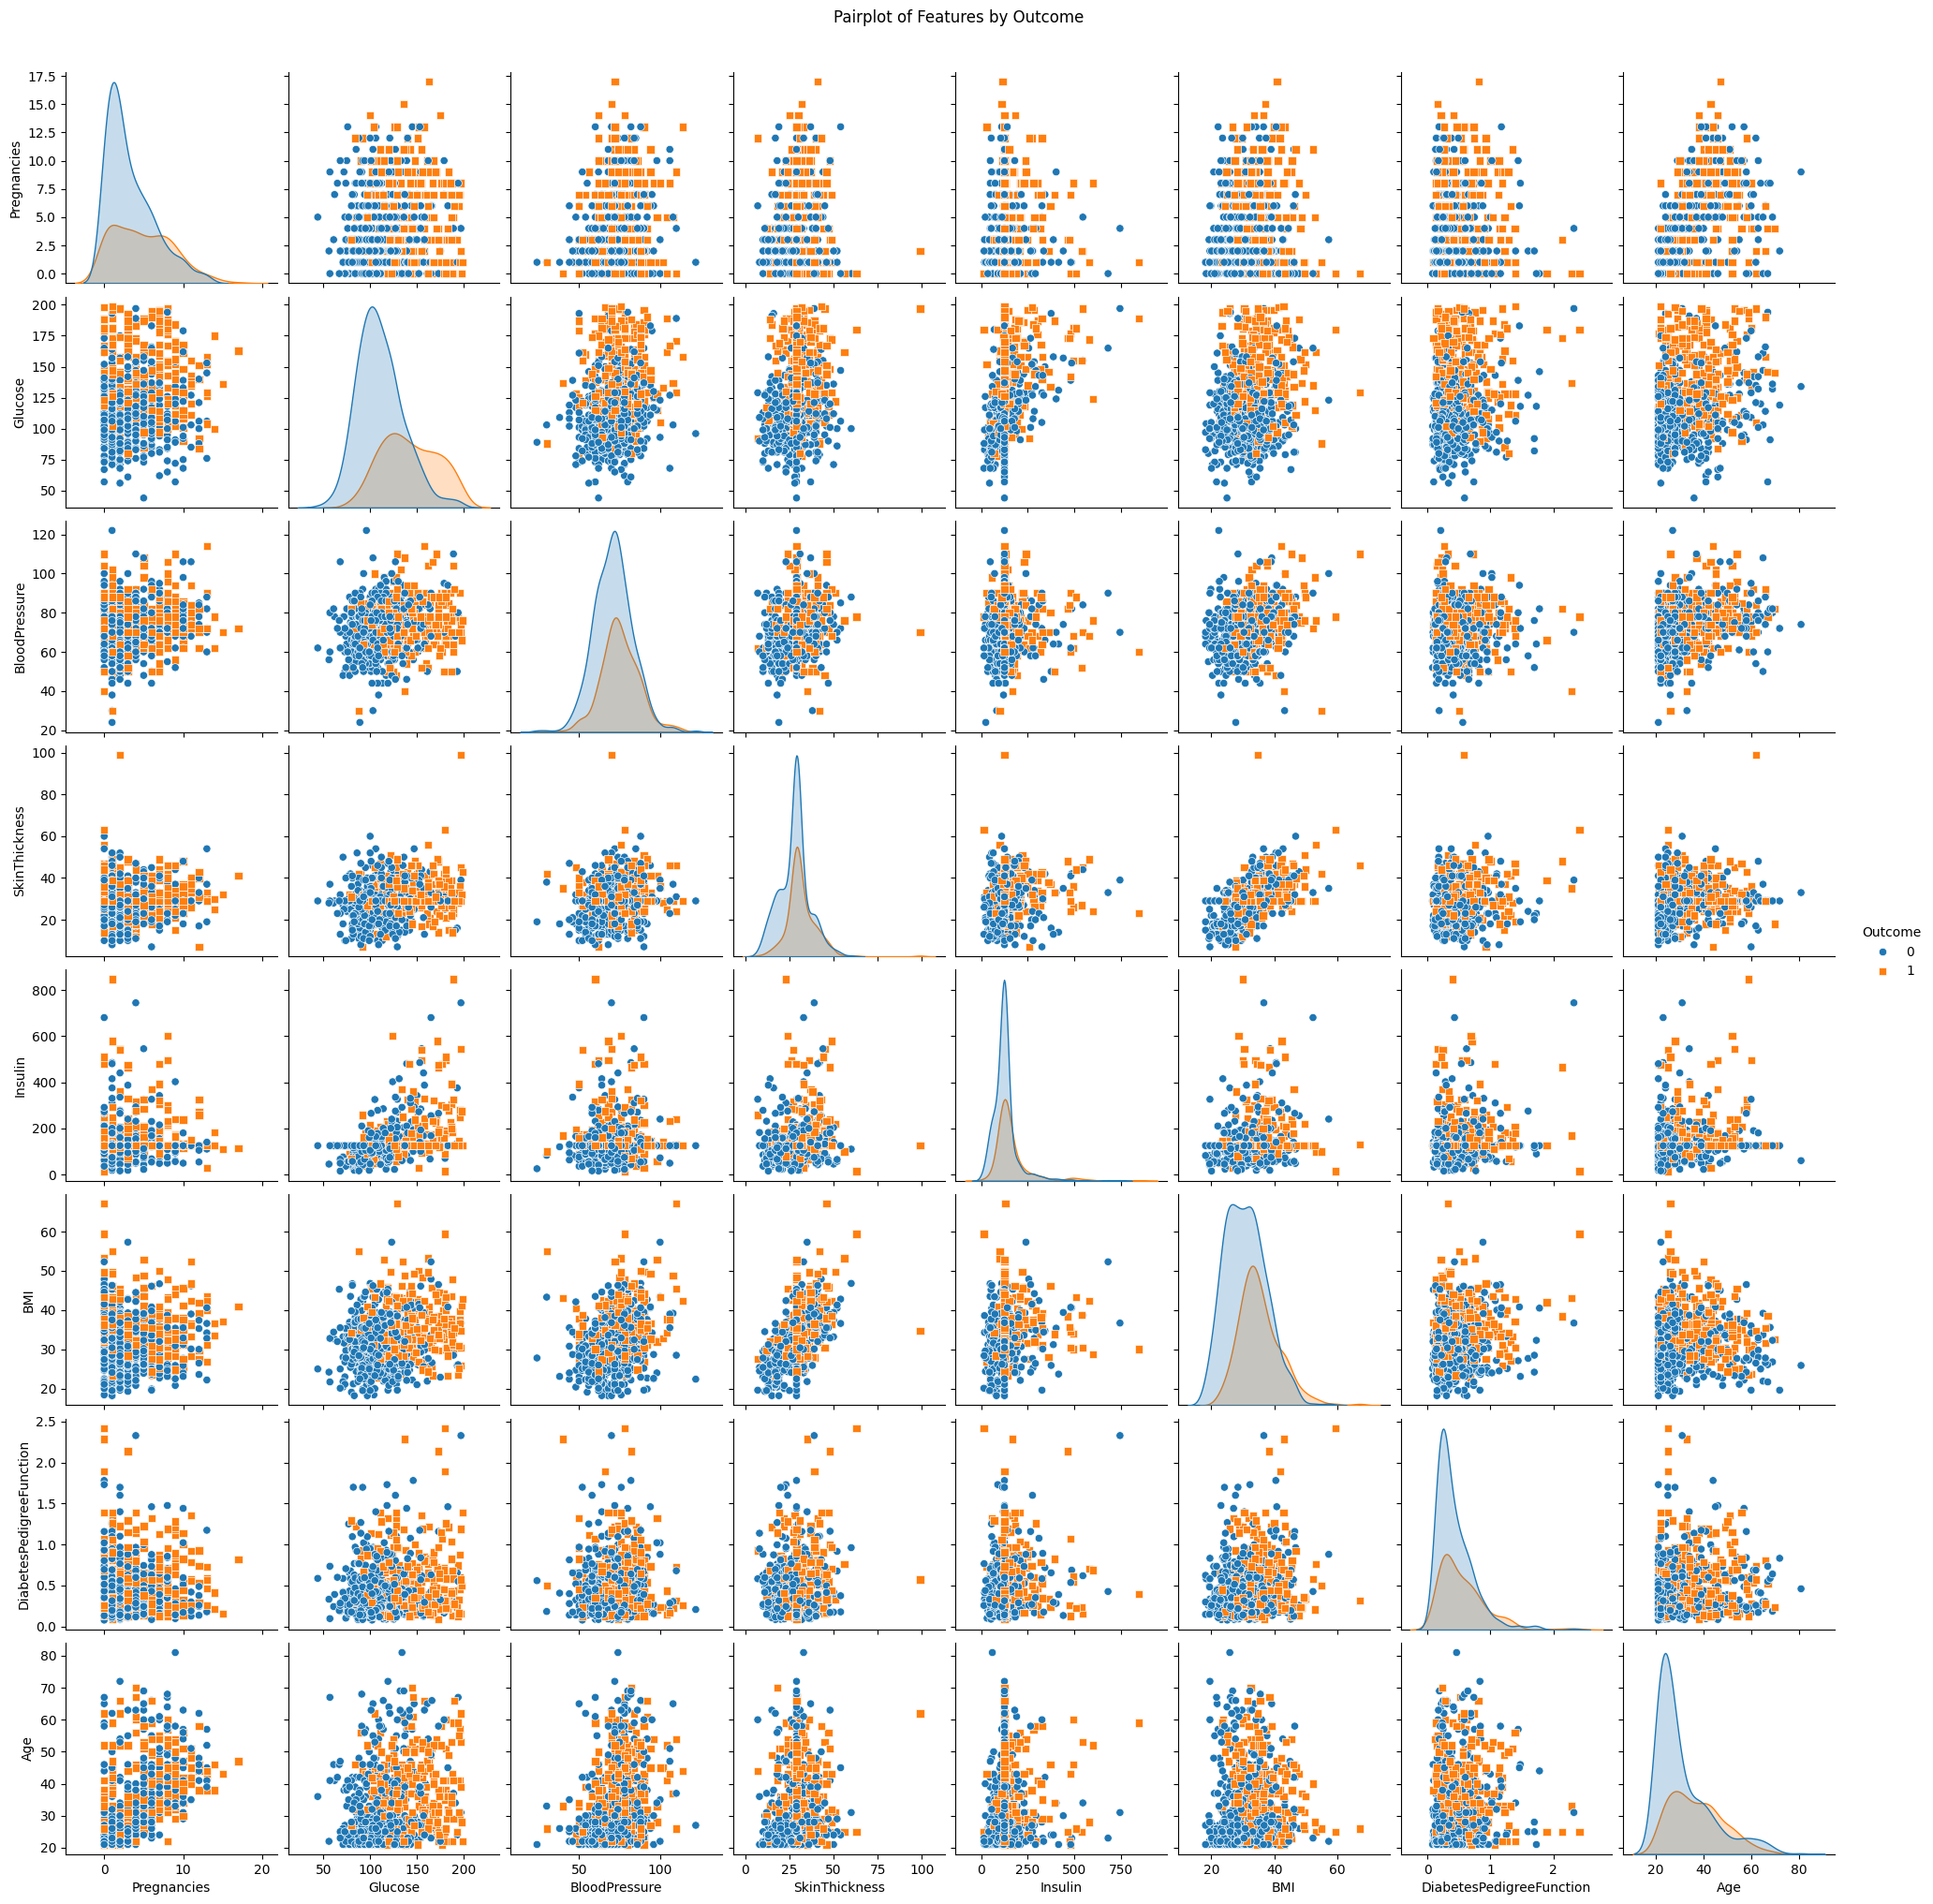

In [39]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='Outcome', markers=["o", "s"])
plt.suptitle("Pairplot of Features by Outcome", y=1.02)
plt.show()

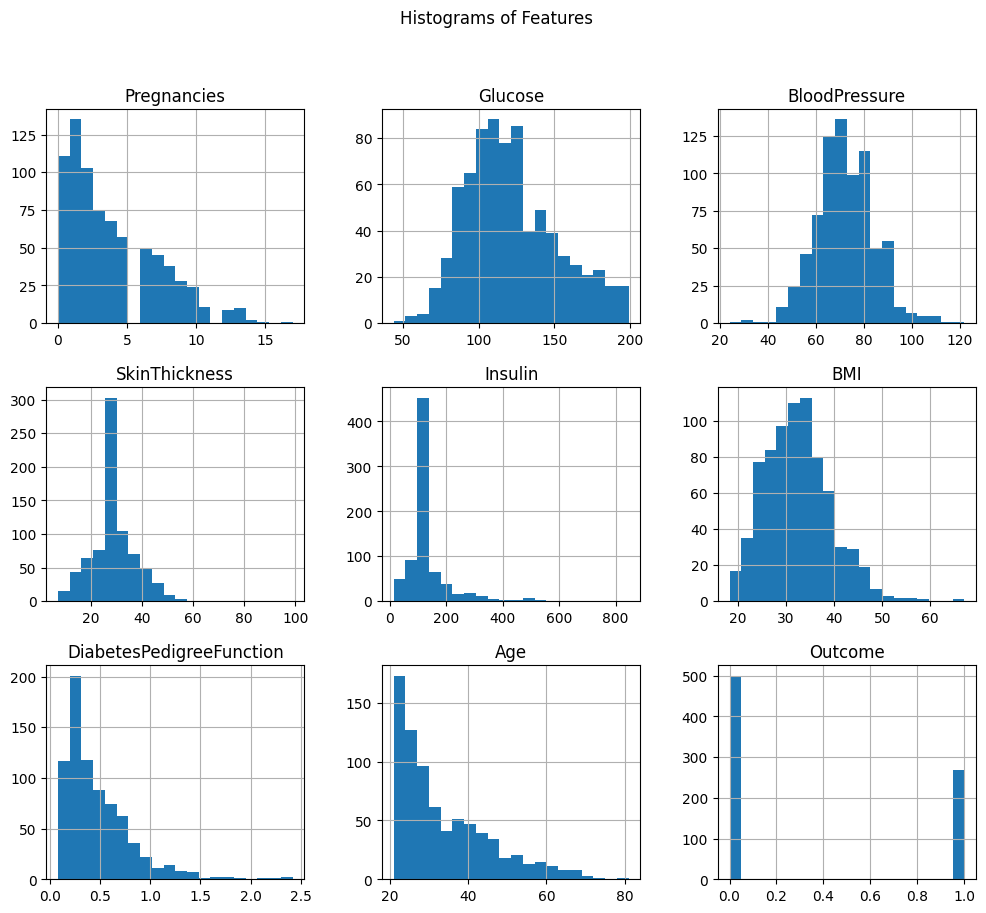

In [40]:
# Histograms of the features
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Features')
plt.show()

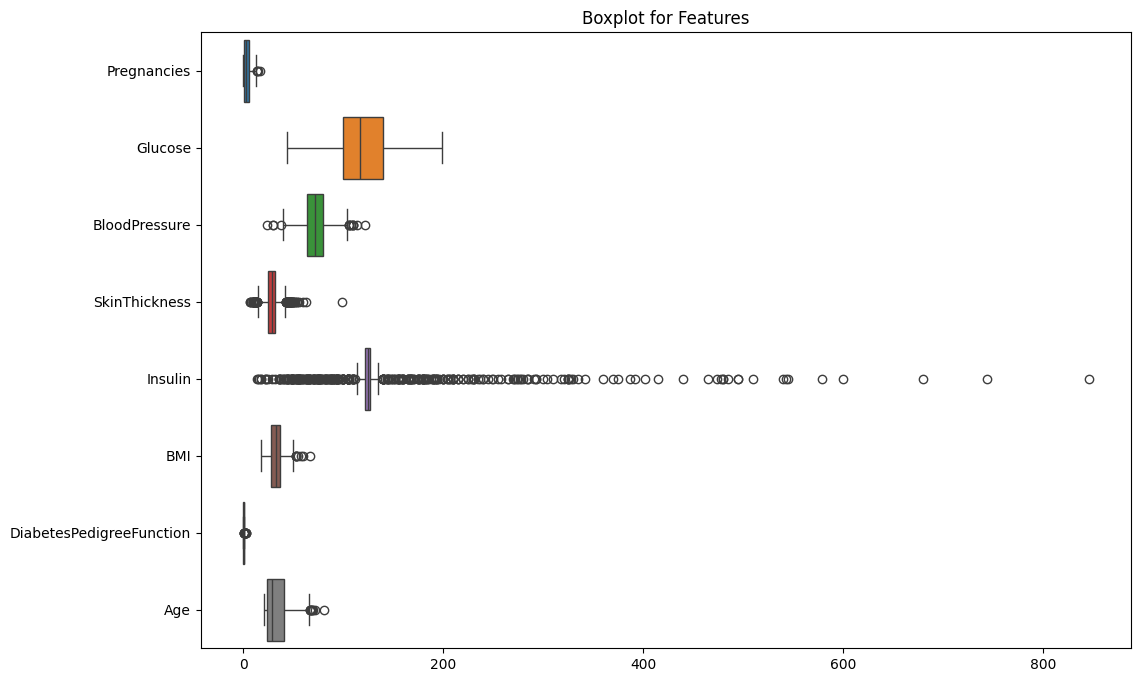

In [41]:
# Boxplot to check for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop('Outcome', axis=1), orient='h')
plt.title('Boxplot for Features')
plt.show()

<Figure size 400x400 with 0 Axes>

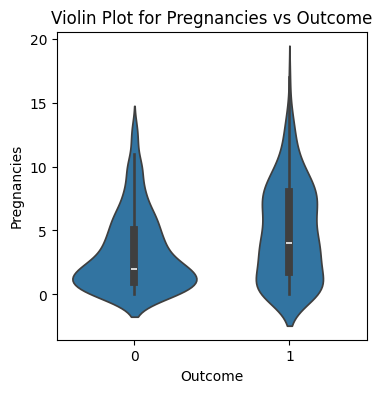

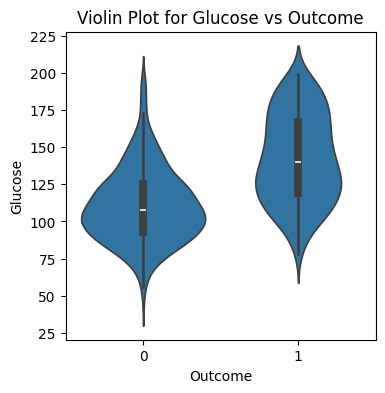

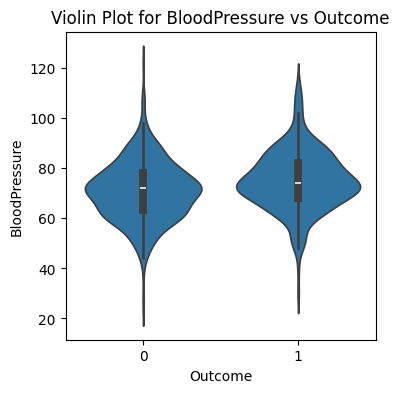

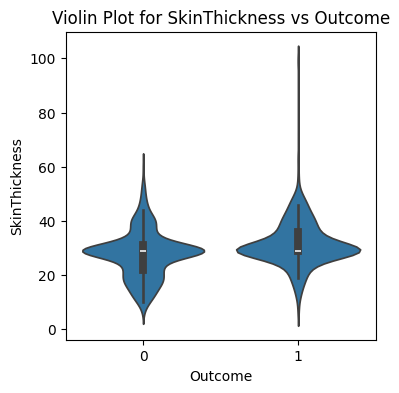

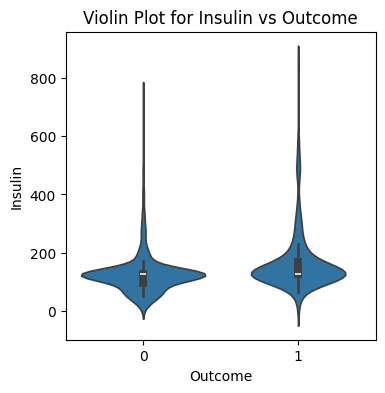

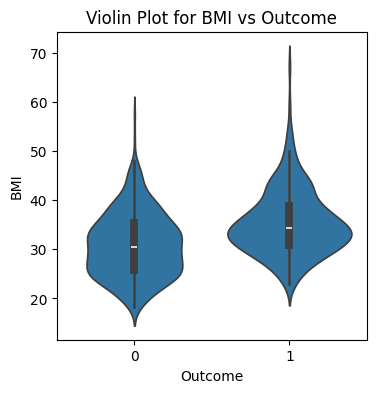

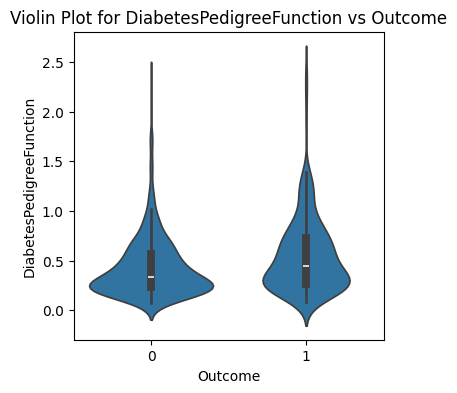

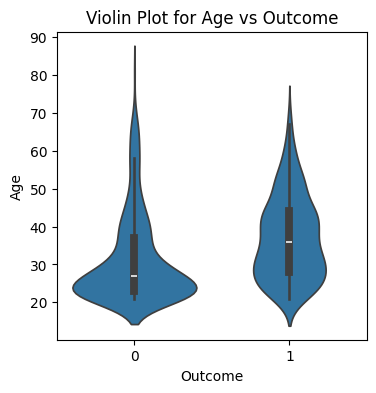

In [45]:
# Violin plot for features vs Outcome (target variable)
plt.figure(figsize=(4, 4))
for feature in df.drop('Outcome', axis=1).columns:
    plt.figure(figsize=(4, 4))
    sns.violinplot(x='Outcome', y=feature, data=df)
    plt.title(f'Violin Plot for {feature} vs Outcome')
    plt.show()

**This helps you understand how strongly each feature relates to the target (Outcome).**

In [30]:
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize the Logistic Regression model
model = LogisticRegression()

In [46]:
# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'The Accuracy using Logistic Regression is : {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)


The Accuracy using Logistic Regression is : 0.7532467532467533
Confusion Matrix:
[[82 17]
 [21 34]]


**DecisionTreeClassifier(random_state=42)	Ensures same tree structure and splits when building the model**

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)


In [54]:
# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model's performance
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)

print(f'The Accuracy using Decision Tree is : {dt_accuracy}')
print('Confusion Matrix:')
print(dt_conf_matrix)

The Accuracy using Decision Tree is : 0.7142857142857143
Confusion Matrix:
[[76 23]
 [21 34]]


Concept how the decision trree works:
[Root Node] Glucose <= 125
├── Yes:
│   ├── BMI <= 30
│   │   ├── Age <= 28 --> Outcome: 0
│   │   └── Age > 28  --> Outcome: 1
│   └── BMI > 30
│       ├── Age <= 35 --> Outcome: 0
│       └── Age > 35  --> Outcome: 1
└── No (Glucose > 125):
    ├── Insulin <= 100
    │   ├── BloodPressure <= 70 --> Outcome: 1
    │   └── BloodPressure > 70  --> Outcome: 1
    └── Insulin > 100
        ├── Age <= 40 --> Outcome: 1
        └── Age > 40  --> Outcome: 1
